In [1]:
!pip install pyarrow

In [ ]:
!pip install fastparquet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_path = "prod_queries2.parquet"
df = pd.read_parquet(file_path)

In [ ]:
df

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209932509 entries, 0 to 209932508
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   keyword     object
 1   product_id  int64 
 2   event       object
 3   platform    object
dtypes: int64(1), object(3)
memory usage: 6.3+ GB
None


In [7]:
print(df.describe(include='all'))

           keyword    product_id                  event   platform
count    209932509  2.099325e+08              209932509  209932509
unique     1458584           NaN                      4          4
top     kuchenland           NaN  listing_products_view    Android
freq        916095           NaN              208049295  122889925
mean           NaN  2.878859e+11                    NaN        NaN
std            NaN  2.421395e+11                    NaN        NaN
min            NaN  0.000000e+00                    NaN        NaN
25%            NaN  1.000308e+11                    NaN        NaN
50%            NaN  1.000612e+11                    NaN        NaN
75%            NaN  6.000094e+11                    NaN        NaN
max            NaN  7.000000e+11                    NaN        NaN


## Самые частые запросы

In [ ]:
top_keywords = df['keyword'].value_counts().head(30)
print("Топ-30 запросов:")
print(top_keywords)

In [ ]:
top_keywords = df['keyword'].value_counts().head(30)
plt.figure(figsize=(10, 6))
top_keywords.plot(kind='bar', color='green')
plt.title("Топ-30 запросов")
plt.ylabel("Частота")
plt.xlabel("Запросы")
plt.show()

## Кол-во уникальных запросов и товаров

In [ ]:
print("\nКоличество уникальных запросов:", df['keyword'].nunique())
print("Количество уникальных товаров:", df['product_id'].nunique())

## Запросы с наибольшим кол-вом уникальных товаров

In [ ]:
product_count_per_keyword = df.groupby('keyword')['product_id'].nunique()
print("Количество уникальных товаров для каждого запроса:")
print(product_count_per_keyword.sort_values(ascending=False).head(10))

## Товары с наибольшим кол-вом уникальных запросов

In [7]:
a = df.groupby('product_id')['keyword'].nunique()
print("Количество уникальных запросов для каждого товара:")
print(a.sort_values(ascending=False).head(15))

Количество уникальных запросов для каждого товара:
product_id
100000000626    1
100000000504    1
100000000512    1
600022782740    1
600022782763    1
600022782766    1
600022782801    1
600022782807    1
100000000526    1
100000000532    1
100000000541    1
100000000546    1
100000000552    1
100000000571    1
100000000601    1
Name: keyword, dtype: int64


In [14]:
a = df.groupby('product_id')['keyword'].nunique()
least_unique_keywords = a.sort_values(ascending=True)[100:200].index

filtered_df = df[df['product_id'].isin(least_unique_keywords)]

print("Запросы для товаров с наименьшим количеством уникальных запросов:")
for product_id, group in filtered_df.groupby('product_id'):
    print(f"Товар ID {product_id}: {group['keyword'].tolist()}")

Запросы для товаров с наименьшим количеством уникальных запросов:
Товар ID 100000000975: ['подгузники-трусики huggies для девочек 9-14 кг, 4 размер']
Товар ID 100000001043: ['гараж хот вилс']
Товар ID 100000001081: ['конструктор mega bloks']
Товар ID 100000001089: ['новогодний поезд 35']
Товар ID 100000001138: ['развивающий коврик фишер прайс']
Товар ID 100000001211: ['куклы monster high']
Товар ID 100000001245: ['mega bloks']
Товар ID 100000001276: ['учегый щенок']
Товар ID 100000001277: ['fisher price сестричка']
Товар ID 100000001285: ['танцевальный коврик для детей']
Товар ID 100000001311: ['затонувший корабль']
Товар ID 100000001332: ['город мастеров конструктор 55']
Товар ID 100000001364: ['новый год подарки']
Товар ID 100000001447: ['игрушка город мастеров конструктор тягач']
Товар ID 100000001449: ['игрушка город мастеров конструктор тягач']
Товар ID 100000001559: ['снегокат большой']
Товар ID 100000002099: ['кукла карета лошадь']
Товар ID 600022759214: ['tommy hilfiger']
Товар

## Распределение по платформам

In [11]:
platform_distribution = df['platform'].value_counts(normalize=True)
print("Распределение по платформам:")
print(platform_distribution)

Распределение по платформам:
platform
Android    0.585378
iOS        0.299099
Desktop    0.064359
Mobile     0.051163
Name: proportion, dtype: float64


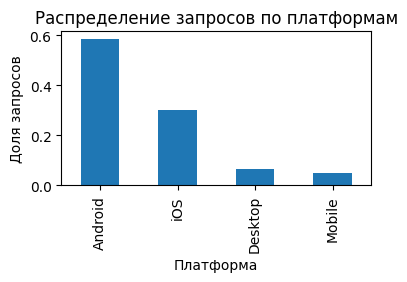

In [12]:
plt.figure(figsize=(4, 2))
platform_distribution.plot(kind='bar')
plt.title("Распределение запросов по платформам")
plt.xlabel("Платформа")
plt.ylabel("Доля запросов")
plt.show()

## Распределение по event

In [13]:
event_distribution = df['event'].value_counts(normalize=True)
print("Распределение по event:")
print(event_distribution)

Распределение по event:
event
listing_products_view    0.991029
product_click            0.005729
add_to_cart              0.002800
product_wishlist_add     0.000442
Name: proportion, dtype: float64


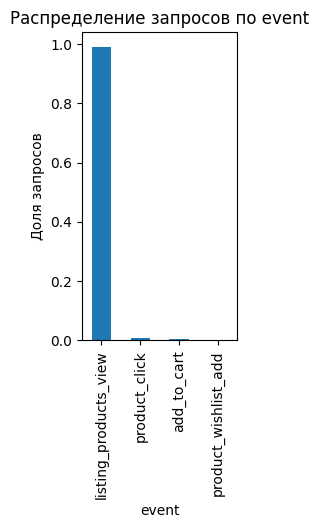

In [14]:
plt.figure(figsize=(2, 4))
event_distribution.plot(kind='bar')
plt.title("Распределение запросов по event")
plt.xlabel("event")
plt.ylabel("Доля запросов")
plt.show()

# Распределение по количеству слов в запросах

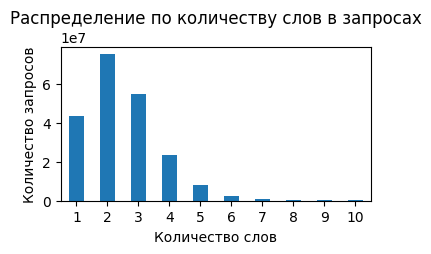

In [15]:
df['word_count'] = df['keyword'].apply(lambda x: len(x.split()))

plt.figure(figsize=(4, 2))
df['word_count'].value_counts().sort_index().head(10).plot(kind='bar')
plt.title("Распределение по количеству слов в запросах")
plt.xlabel("Количество слов")
plt.ylabel("Количество запросов")
plt.xticks(rotation=0)
plt.show()

## Конверсия в корзину

In [30]:
total_queries = df['keyword'].nunique()
total_add_to_cart = df[df['event'] == 'add_to_cart']['keyword'].nunique()
conversion_rate = total_add_to_cart / total_queries
print(f"Conversion Rate: {conversion_rate:.2%}")

Conversion Rate: 9.77%


## Конверсия в корзину для каждого товара

In [20]:
conversion_by_product = df[df['event'] == 'add_to_cart'].groupby('product_id').size() / df.groupby('product_id').size()
print("\nКонверсия в корзину для каждого товара:")
print(conversion_by_product.fillna(0).sort_values(ascending=True).head(50))




Конверсия в корзину для каждого товара:
product_id
600004280721    0.0
600004280799    0.0
600004280798    0.0
600004280797    0.0
600004280796    0.0
600004280795    0.0
600004280794    0.0
600004280793    0.0
600004280792    0.0
600004280791    0.0
600004280790    0.0
600004280725    0.0
600004280724    0.0
600004280723    0.0
600004280800    0.0
600004280720    0.0
600004280537    0.0
600004280536    0.0
600004280535    0.0
600004280534    0.0
600004280533    0.0
600004280532    0.0
600004280531    0.0
600004280530    0.0
600004280528    0.0
600004280527    0.0
600004280526    0.0
600004280525    0.0
600004281091    0.0
600004281152    0.0
600004281151    0.0
600004281150    0.0
600004281149    0.0
600004281122    0.0
600004281120    0.0
600004281119    0.0
600004281118    0.0
600004281117    0.0
600004281116    0.0
600004281115    0.0
600004281114    0.0
600004281092    0.0
600004280524    0.0
600004281090    0.0
600004281089    0.0
600004281088    0.0
600004281087    0.0
60000428

## Запросы для товаров с маленькой конверсией

In [11]:
conversion_by_product = df[df['event'] == 'add_to_cart'].groupby('product_id').size() / df.groupby('product_id').size()

# товары с маленькой конверсией
zero_conversion_products = conversion_by_product[conversion_by_product < 0.01].index
zero_conversion_products

zero_conversion_queries = df[df['product_id'].isin(zero_conversion_products)]['keyword']

print("\nЗапросы для товаров с маленькой конверсией:")
zero_conversion_queries.unique()[:10]


Запросы для товаров с маленькой конверсией:


array(['ушм макита', 'посудомоечная машина', 'прихожая комплект',
       'grandorf для собак', 'диваны', 'xiaomi 14t pro',
       'телевизор смарт тв', 'телевизоры смарт', 'смарт телевизоры',
       'маленькая'], dtype=object)

## Конверсии в корзину по платформам

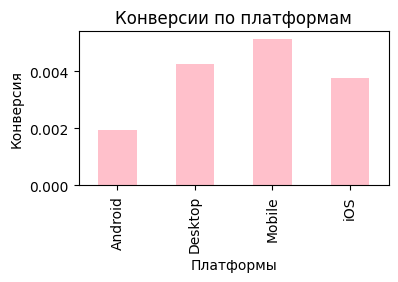

In [44]:
platform_conversion = df.groupby('platform')['event'].apply(lambda x: sum(x == 'add_to_cart') / len(x))
plt.figure(figsize=(4, 2))
platform_conversion.plot(kind='bar', color='pink')
plt.title("Конверсии по платформам")
plt.ylabel("Конверсия")
plt.xlabel("Платформы")
plt.show()

## Конверсии в клики по платформам

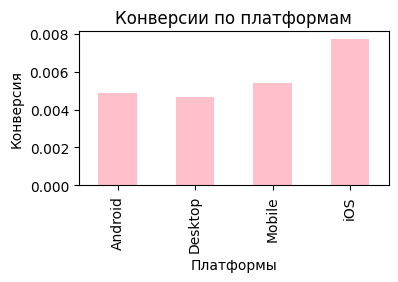

In [22]:
platform_conversion = df.groupby('platform')['event'].apply(lambda x: sum(x == 'product_click') / len(x))
plt.figure(figsize=(4, 2))
platform_conversion.plot(kind='bar', color='pink')
plt.title("Конверсии по платформам")
plt.ylabel("Конверсия")
plt.xlabel("Платформы")
plt.show()

## Конверсии в вишлист по платформам

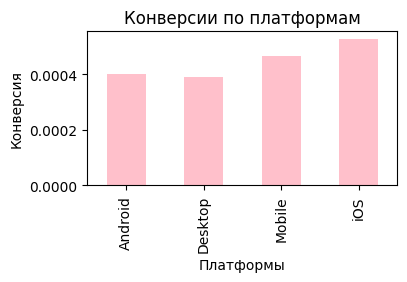

In [8]:
platform_conversion = df.groupby('platform')['event'].apply(lambda x: sum(x == 'product_wishlist_add') / len(x))
plt.figure(figsize=(4, 2))
platform_conversion.plot(kind='bar', color='pink')
plt.title("Конверсии по платформам")
plt.ylabel("Конверсия")
plt.xlabel("Платформы")
plt.show()

# Выделение высокочастотных запросов

In [6]:
df['keyword'] = df['keyword'].str.lower().str.strip()

# частота каждого запроса
keyword_counts = df['keyword'].value_counts().reset_index()
type(keyword_counts)

pandas.core.frame.DataFrame

In [7]:
keyword_counts.columns = ['keyword', 'frequency']

In [8]:
keyword_counts

,keyword,frequency
0,kuchenland,916095
1,стиральная машина,901504
2,чайники электрические,493844
3,смартфоны,491318
4,iphone 15,468263
...,...,...
1458572,набор лаков для стемпинга,1
1458573,стиральная машина с сушкой candy smart pro,1
1458574,miamitats baby,1
1458575,fairy 96,1


In [11]:
# верхние 2%
high_freq_threshold = keyword_counts['frequency'].quantile(0.98)
high_freq_threshold

778.0

In [15]:
high_freq_keywords = keyword_counts[keyword_counts['frequency'] >= high_freq_threshold]

print(f"Количество высокочастотных запросов: {len(high_freq_keywords)}")

Количество высокочастотных запросов: 29199


In [21]:
high_freq_keywords = high_freq_keywords[high_freq_keywords['keyword'].str.split().str.len() > 1]

In [25]:
high_freq_keywords['keyword'].head(10).tolist()

['стиральная машина',
 'чайники электрические',
 'iphone 15',
 'телевизор смарт тв',
 'микроволновые печи',
 'наушники беспроводные',
 'яндекс станция',
 'стулья для кухни',
 'iphone 16',
 'увлажнитель воздуха']

In [18]:
high_freq_keywords.shape

(29199, 2)

# Выделение низкочастотных запросов

In [ ]:
df['keyword'] = df['keyword'].str.lower().str.strip()

# частота каждого запроса
keyword_counts = df['keyword'].value_counts().reset_index()
type(keyword_counts)

In [ ]:
keyword_counts.columns = ['keyword', 'frequency']

In [ ]:
keyword_counts

In [18]:
# # нижние 2%
# low_freq_threshold = keyword_counts['frequency'].quantile(0.02)
# low_freq_keywords = keyword_counts[keyword_counts['frequency'] <= low_freq_threshold]

# print(f"Количество низкочастотных запросов: {len(low_freq_keywords)}")

Количество низкочастотных запросов: 68295


In [ ]:
# нижние 2%
low_freq_threshold = keyword_counts['frequency'].quantile(0.02)
low_freq_keywords = keyword_counts[keyword_counts['frequency'] == 1]

print(f"Количество низкочастотных запросов: {len(low_freq_keywords)}")

In [ ]:
low_freq_keywords.head()

In [21]:
low_freq_keywords.shape

(68295, 2)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Определить оптимальное значение max_features для TfidfVectorizer¶

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(df['keyword'])

# сумм частота слов
word_counts = np.array(X_counts.sum(axis=0)).flatten()
sorted_counts = np.sort(word_counts)[::-1]

# кумулятивная доля
cumulative_coverage = np.cumsum(sorted_counts) / np.sum(sorted_counts)

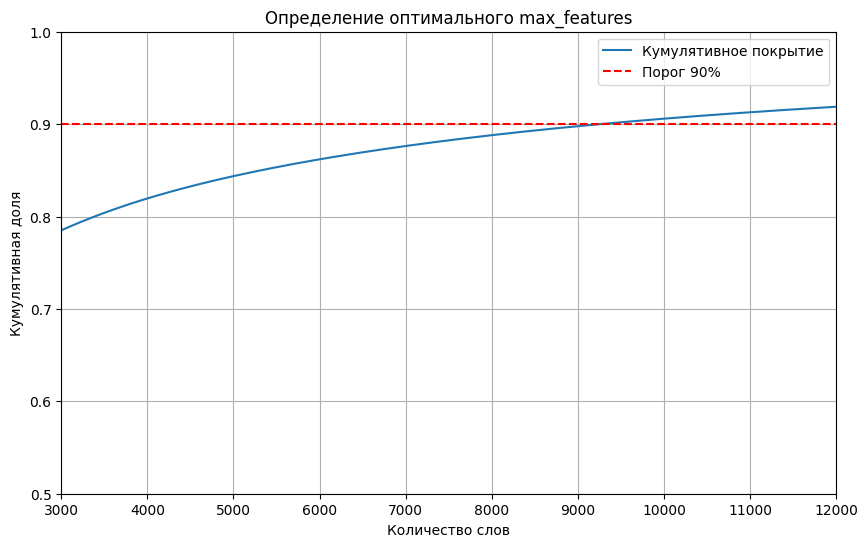

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_coverage) + 1), cumulative_coverage, label='Кумулятивное покрытие')
plt.axhline(y=0.9, color='r', linestyle='--', label='Порог 90%')
plt.xlim(3000, 12000)  # Ограничиваем ось X до первых 100000 слов
plt.ylim(0.5, 1)
plt.xlabel('Количество слов')
plt.ylabel('Кумулятивная доля')
plt.title('Определение оптимального max_features')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# запросы в TF-IDF векторы
vectorizer = TfidfVectorizer(max_features=9200)
X = vectorizer.fit_transform(low_freq_keywords['keyword'])

# Elbow method

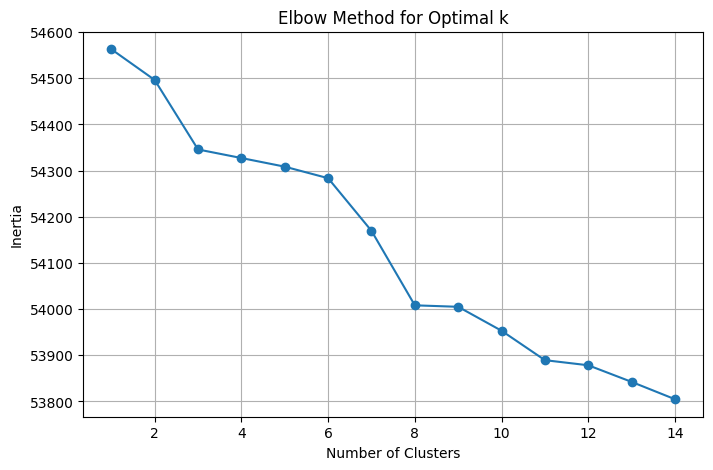

In [26]:
inertia = []
K = range(1, 15) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Silhouette Method

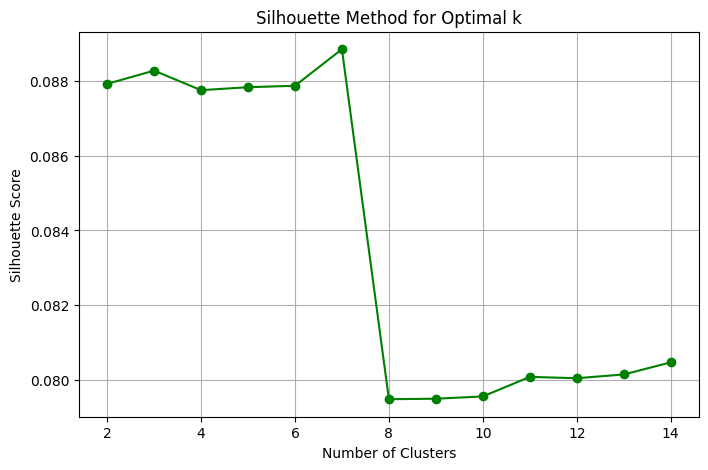

In [27]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 15) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o', color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid(True)
plt.show()

# Кластеризация методом DBSCAN

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [39]:
dbscan = DBSCAN(eps=0.7, min_samples=20, metric='euclidean')  # Настройте параметры
dbscan_labels = dbscan.fit_predict(X)

In [40]:
import numpy as np

unique_clusters = np.unique(dbscan_labels)
print(f"Количество кластеров: {len(unique_clusters) - 1} (без учета шума)")
print(f"Шумовых точек: {sum(dbscan_labels == -1)}")

Количество кластеров: 105 (без учета шума)
Шумовых точек: 51242


In [41]:
if len(unique_clusters) > 1:
    silhouette = silhouette_score(X, dbscan_labels)
    print(f"Silhouette Score: {silhouette}")
else:
    print("Недостаточно кластеров для расчета силуэта.")

Silhouette Score: 0.015763788090931864


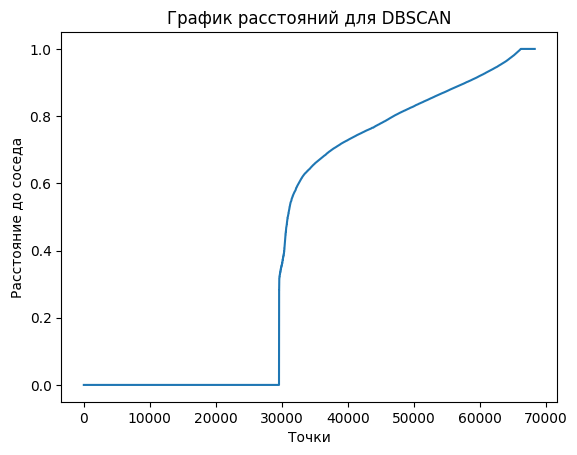

In [101]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)  # min_samples
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:, 4])  # Берём 4-е расстояние (n_neighbors - 1)
plt.plot(distances)
plt.xlabel('Точки')
plt.ylabel('Расстояние до соседа')
plt.title('График расстояний для DBSCAN')
plt.show()

In [103]:
from sklearn.metrics import silhouette_score

best_eps = None
best_min_samples = None
best_score = -1

for eps in np.arange(0.2, 1.0, 0.1):  # Пример диапазона для eps
    for min_samples in range(3, 10):  # Пример диапазона для min_samples
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        if len(set(labels)) > 1 and -1 not in labels:  # Убедимся, что есть кластеры
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Лучшее значение eps: {best_eps}, min_samples: {best_min_samples}, Silhouette Score: {best_score}")

Лучшее значение eps: None, min_samples: None, Silhouette Score: -1


# Кластеризация методом K-means

In [29]:
# Кластеризация K-Means
low_freq_keywords = low_freq_keywords.copy()
kmeans = KMeans(n_clusters=5, random_state=42)
low_freq_keywords['cluster'] = kmeans.fit_predict(X)


# kmeans = KMeans(n_clusters=7, random_state=42)
# low_freq_keywords.loc[:, 'cluster'] = kmeans.fit_predict(X)

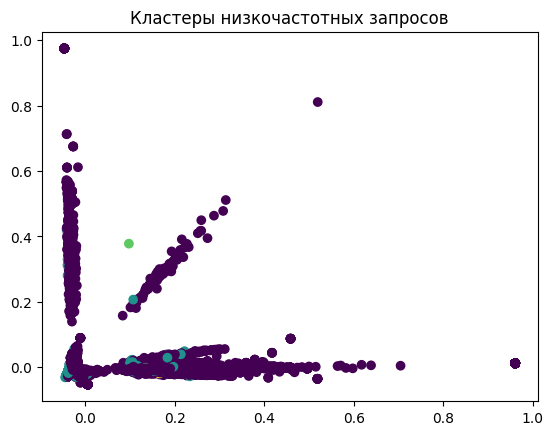

In [30]:
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X.toarray())

plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=low_freq_keywords['cluster'], cmap='viridis')
plt.title("Кластеры низкочастотных запросов")
plt.show()

In [31]:
cluster_counts = low_freq_keywords['cluster'].value_counts()
print(cluster_counts)

cluster
0    67184
2      924
1      105
3       48
4       34
Name: count, dtype: int64


#### Примеры запросов из каждого кластера, чтобы понять их общую тему:

In [32]:
for cluster_id in low_freq_keywords['cluster'].unique():
    print(f"\nКластер {cluster_id}:")
    cluster_keywords = low_freq_keywords[low_freq_keywords['cluster'] == cluster_id]['keyword']
    print(cluster_keywords.sample(10))  # Примеры запросов


Кластер 0:
1407319          жидкостный подогреватель двигателя 12v
1450402        плинтус перфект plus pp-51 2000x31x34 мм
1398278    вино noble fleurs rouge красное сухое 0,75 л
1443466                                     капус 10.28
1400161                           monin масло отивковое
1400317                                  psd416g240081s
1437640                                спрей tigi queen
1416807                               элевит 2 триместр
1401464                                     iek автомат
1444147                                  творог красная
Name: keyword, dtype: object

Кластер 2:
1412373                               babyliss pro плойка 32
1425290      беспроводные наушники oneplus buds pro 2r white
1408276                                        14+iphone+pro
1406510                           проектор hisense px3se-pro
1442787                                        dream x10 pro
1432353                     противень tefal pro cook 28*22см
1436767              

Для каждого кластера проанализировать:
- Распределение платформ (Android, iOS, Desktop, Mobile).
- Распределение событий (listing_products_view, product_click, add_to_cart).

In [33]:
for cluster_id in low_freq_keywords['cluster'].unique():
    cluster_data = df[df['keyword'].isin(
        low_freq_keywords[low_freq_keywords['cluster'] == cluster_id]['keyword']
    )]
    print(f"\nКластер {cluster_id}:")
    print(cluster_data['platform'].value_counts(normalize=True))
    print(cluster_data['event'].value_counts(normalize=True))


Кластер 0:
platform
iOS        0.436473
Android    0.301426
Desktop    0.196773
Mobile     0.065328
Name: proportion, dtype: float64
event
listing_products_view    0.947949
add_to_cart              0.029442
product_click            0.022223
product_wishlist_add     0.000387
Name: proportion, dtype: float64

Кластер 2:
platform
iOS        0.462121
Android    0.282468
Desktop    0.192641
Mobile     0.062771
Name: proportion, dtype: float64
event
listing_products_view    0.941558
add_to_cart              0.048701
product_click            0.009740
Name: proportion, dtype: float64

Кластер 3:
platform
iOS        0.458333
Android    0.333333
Mobile     0.125000
Desktop    0.083333
Name: proportion, dtype: float64
event
listing_products_view    1.0
Name: proportion, dtype: float64

Кластер 1:
platform
Android    0.361905
iOS        0.361905
Mobile     0.152381
Desktop    0.123810
Name: proportion, dtype: float64
event
listing_products_view    0.961905
add_to_cart              0.019048
produc

#### Конверсии по кластерам

In [34]:
for cluster_id in low_freq_keywords['cluster'].unique():
    cluster_data = df[df['keyword'].isin(
        low_freq_keywords[low_freq_keywords['cluster'] == cluster_id]['keyword']
    )]
    ctr = cluster_data['event'].value_counts(normalize=True).get('product_click', 0)
    cr = cluster_data['event'].value_counts(normalize=True).get('add_to_cart', 0)
    print(f"Кластер {cluster_id}: CTR = {ctr:.2%}, CR = {cr:.2%}")

Кластер 0: CTR = 2.22%, CR = 2.94%
Кластер 2: CTR = 0.97%, CR = 4.87%
Кластер 3: CTR = 0.00%, CR = 0.00%
Кластер 1: CTR = 1.90%, CR = 1.90%
Кластер 4: CTR = 2.94%, CR = 2.94%
